In [2]:
#InstallLibrary
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install scikit-learn

In [1]:
#For Data Manipulation
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
from pandas import read_csv

#For Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#For Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [57]:
#Import the dataset
customerseg = pd.read_excel(r'C:\Users\Dell\Desktop\YuvikaPython\Online Retail.xlsx')
customerseg.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [79]:
#EXPLORATORY DATA ANALYSIS
customerseg.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,541909.000000,541909.000000
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38,NaN,NaN
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478,NaN,NaN
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN,2010.921609,7.553128
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN,2010.000000,1.000000
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN,2011.000000,5.000000
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN,2011.000000,8.000000
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN,2011.000000,11.000000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN,2011.000000,12.000000


In [83]:
customerseg['Year'] = customerseg['InvoiceDate'].apply(lambda x : x.year)
customerseg['Month'] = customerseg['InvoiceDate'].apply(lambda x : x.month)
customerseg.head()     

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [85]:
#Customer Basic Information
customerseg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int64         
 9   Month        541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 41.3+ MB


In [87]:
#DATA PREPRATION & CLEANING

In [89]:
#Checking for negative values
print(customerseg["Quantity"].min())
print(customerseg["UnitPrice"].min())

-80995
-11062.06


In [91]:
#Deleting return data
customerseg = customerseg.loc[customerseg["Quantity"] >0 ]
customerseg = customerseg.loc[customerseg["UnitPrice"] >0 ]
customerseg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12


In [93]:
#check for negative value
print(customerseg["Quantity"].min())
print(customerseg["UnitPrice"].min())   

1
0.001


In [103]:
customerseg.shape

(530104, 10)

In [101]:
#total countries
databycountry = customerseg["Country"].value_counts()
databycountry

Country
United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57


In [105]:
#Total Invoicecount
invoicecount = customerseg["InvoiceNo"].value_counts()
invoicecount

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
574320       1
539081       1
574324       1
566009       1
570725       1
Name: count, Length: 19960, dtype: int64

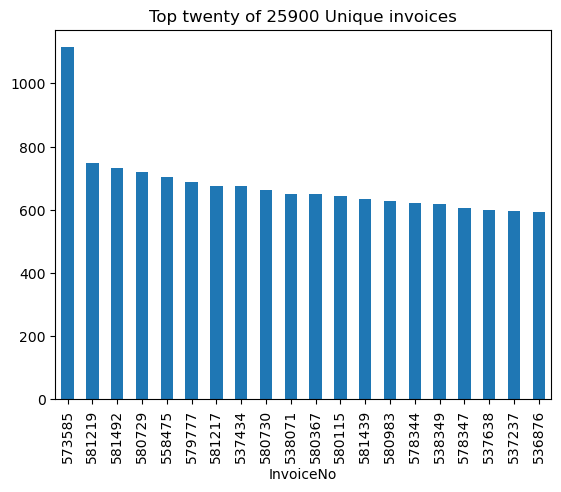

In [107]:
#Top twenty of 25900 Unique invoices
invoicecount[0:20].plot(kind = 'bar')
plt.title("Top twenty of 25900 Unique invoices")
plt.show()
#This shows that these customers might not have the most number of orders, but they are recurring — meaning they ordered many different products in a single invoice.


C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\2112905998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = items.index, y = items.values, palette=sns.color_palette("dark:b"), order = items.index)
C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\2112905998.py:3: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = items.index, y = items.values, palette=sns.color_palette("dark:b"), order = items.index)


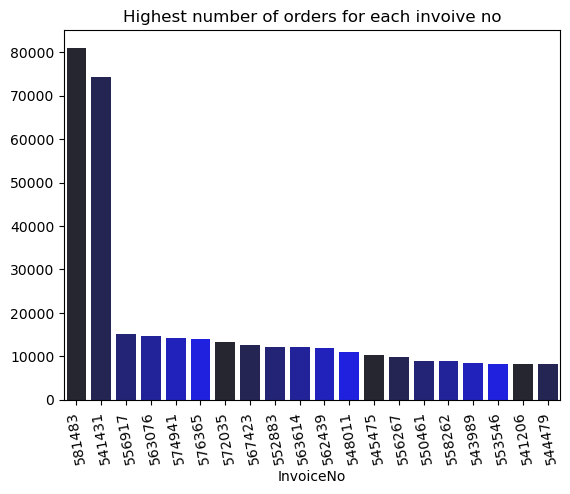

In [111]:
#Highest number of orders for each invoice no
items = customerseg.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending = False) [:20]
sns.barplot(x = items.index, y = items.values, palette=sns.color_palette("dark:b"), order = items.index)
plt.title("Highest number of orders for each invoive no");
plt.xticks(rotation=100);
#Invoice no with the highest quantity ordered.


C:\Users\Dell\AppData\Local\Temp\ipykernel_33560\2908297061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = databycountry.index, y = databycountry.values, palette=sns.color_palette("dark:b"), order = databycountry.index)
C:\Users\Dell\AppData\Local\Temp\ipykernel_33560\2908297061.py:5: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = databycountry.index, y = databycountry.values, palette=sns.color_palette("dark:b"), order = databycountry.index)


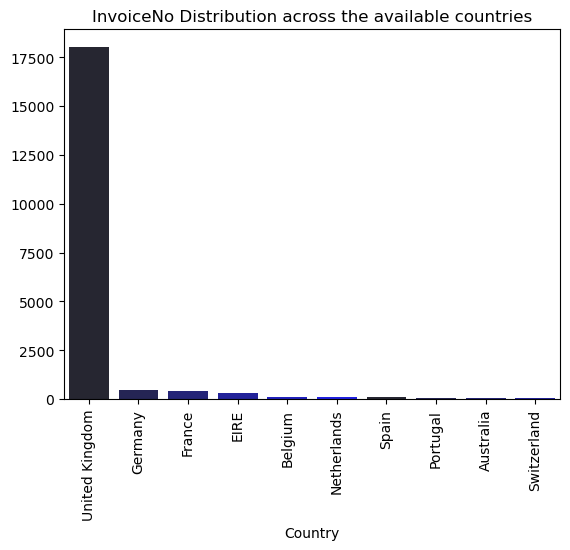

In [106]:
#InvoiceNo Distribution across the available countries
import seaborn as sns
import matplotlib.pyplot as plt
databycountry = customerseg.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False)[:10]
sns.barplot(x = databycountry.index, y = databycountry.values, palette=sns.color_palette("dark:b"), order = databycountry.index)
plt.title("InvoiceNo Distribution across the available countries");
plt.xticks(rotation=90);


In [113]:
stockcodecount = customerseg['StockCode'].value_counts()
stockcodecount

StockCode
85123A      2265
85099B      2112
22423       2017
47566       1706
20725       1595
            ... 
DCGS0004       1
84705C         1
20964          1
72803b         1
23843          1
Name: count, Length: 3922, dtype: int64

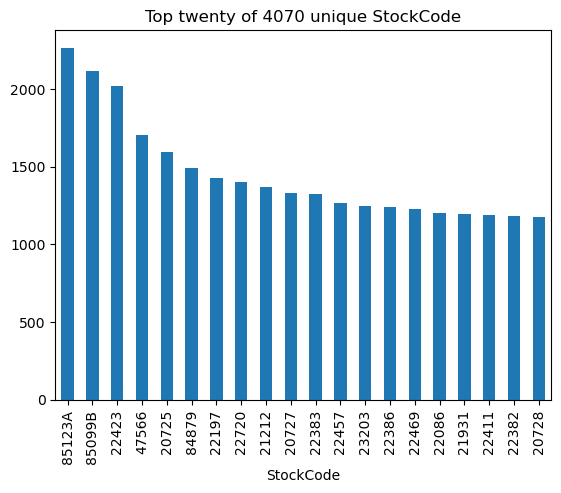

In [115]:
#TOP 20 OF 4070 UNIQUE STOCKCODE
stockcodecount[0:20].plot(kind = 'bar')
plt.title("Top twenty of 4070 unique StockCode")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\3349998391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = databycountry.index, y = databycountry.values, palette=sns.color_palette("dark:b"), order = databycountry.index)
C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\3349998391.py:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = databycountry.index, y = databycountry.values, palette=sns.color_palette("dark:b"), order = databycountry.index)


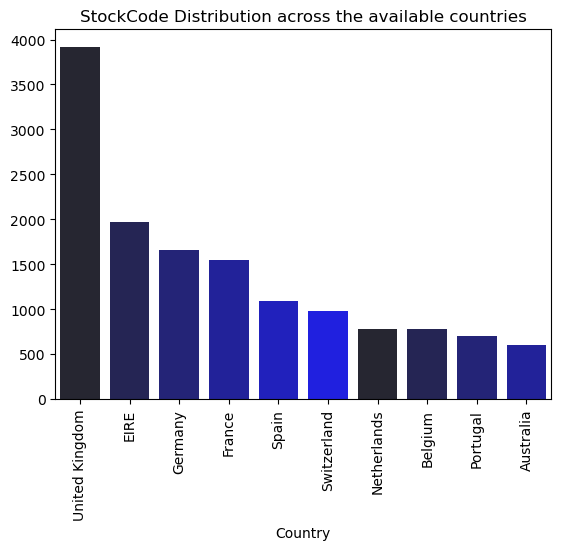

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
databycountry = customerseg.groupby('Country')['StockCode'].nunique().sort_values(ascending = False)[:10]
sns.barplot(x = databycountry.index, y = databycountry.values, palette=sns.color_palette("dark:b"), order = databycountry.index)
plt.title("StockCode Distribution across the available countries");
plt.xticks(rotation=90);


C:\Users\Dell\AppData\Local\Temp\ipykernel_33560\2932980221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = items.index, y = items.values, palette = sns.color_palette("dark:b"))
C:\Users\Dell\AppData\Local\Temp\ipykernel_33560\2932980221.py:3: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = items.index, y = items.values, palette = sns.color_palette("dark:b"))


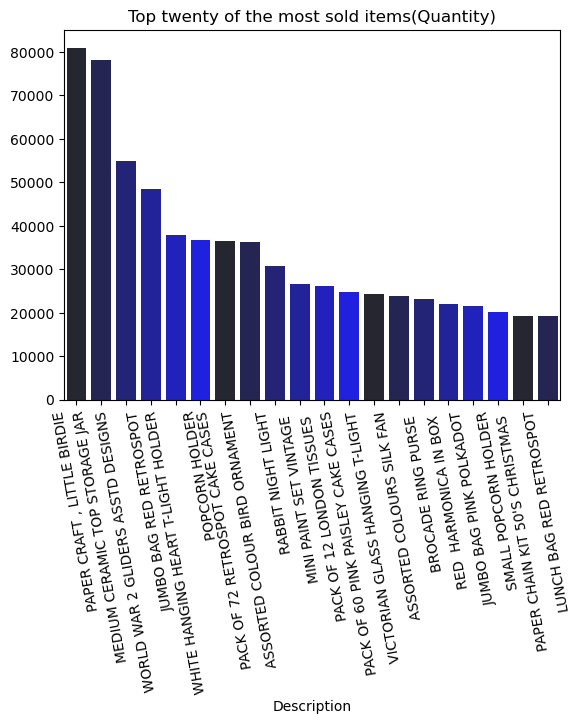

In [269]:
#TOP TWENTY OF THE MOST SOLD ITEMS(QUANTITY)
items = customerseg.groupby('Description')['Quantity'].sum().sort_values(ascending = False)[:20]
sns.barplot(x = items.index, y = items.values, palette = sns.color_palette("dark:b"))
plt.title("Top twenty of the most sold items(Quantity)");
plt.xticks(rotation = 100);
            

C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\1837006796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = item_counts.index, y = item_counts.values, palette = sns.color_palette("dark:b"), order = item_counts.index)
C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\1837006796.py:3: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = item_counts.index, y = item_counts.values, palette = sns.color_palette("dark:b"), order = item_counts.index)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(8, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(9, 0, 'NATURAL SLATE HEART CHALKBOARD '),
  Text(10, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(11, 0, 'HEART OF WICKER SMALL'),
  Text(12, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(13, 0, 'JUMBO STORAGE BAG SUKI'),
  Text(14, 0, 'JUMBO SHOPPER VINTAGE RED PAISLEY'),
  Text(15, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(16, 0, 'LUNCH BAG CARS BLUE'),
  Text(17, 0, 'JAM MAKING SET PRINTED'),
  Text(18, 0, 'SPOTTY BUNTING'),
  Text(19, 0, 'JAM MAKING SET WITH JARS')])

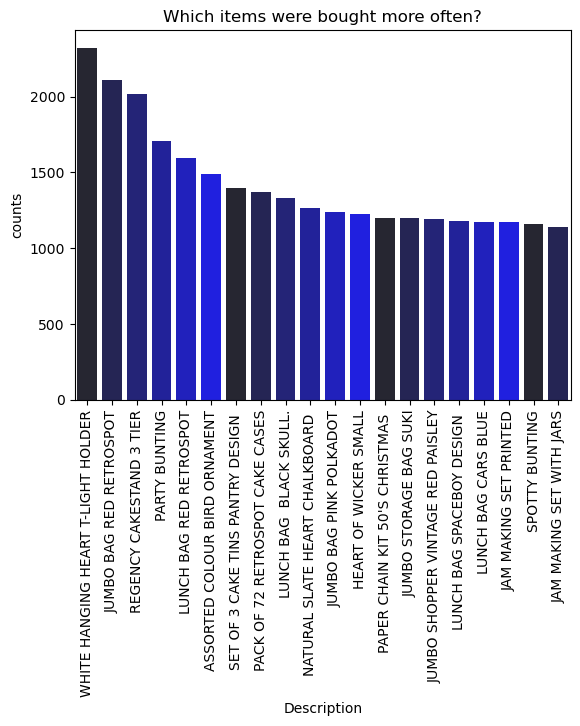

In [119]:
#Which items were bought more often?
item_counts = customerseg['Description'].value_counts().sort_values(ascending = False).head(20)
sns.barplot(x = item_counts.index, y = item_counts.values, palette = sns.color_palette("dark:b"), order = item_counts.index) 
plt.ylabel("counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation = 90)

In [121]:
customerseg['Sales'] = customerseg['Quantity'] * customerseg['UnitPrice']

C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\1079162889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=sns.color_palette("dark:b"),)
C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\1079162889.py:5: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=sns.color_palette("dark:b"),)


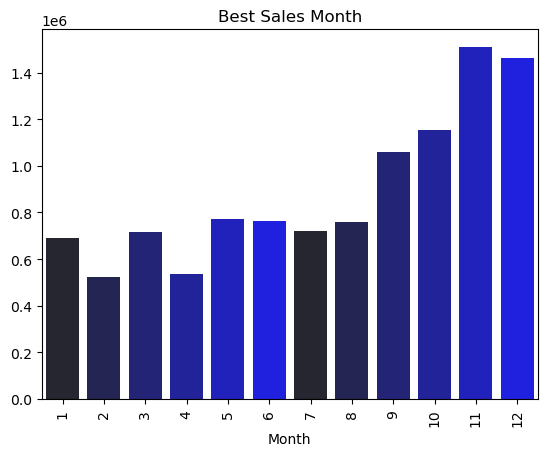

In [123]:
#BEST SALES MONTH

customerseg['Sales'] = customerseg['Quantity'] * customerseg['UnitPrice']
sales_per_month = customerseg[customerseg['Sales']>0].groupby('Month')['Sales'].sum().sort_values(ascending = False)
sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=sns.color_palette("dark:b"),)
plt.title("Best Sales Month");
plt.xticks(rotation = 90);

           Country        Sales
36  United Kingdom  9025222.084
24     Netherlands   285446.340
10            EIRE   283453.960
14         Germany   228867.140
13          France   209715.110
0        Australia   138521.310
31           Spain    61577.110
33     Switzerland    57089.900
3          Belgium    41196.340
32          Sweden    38378.330
Axes(0.125,0.11;0.775x0.77)


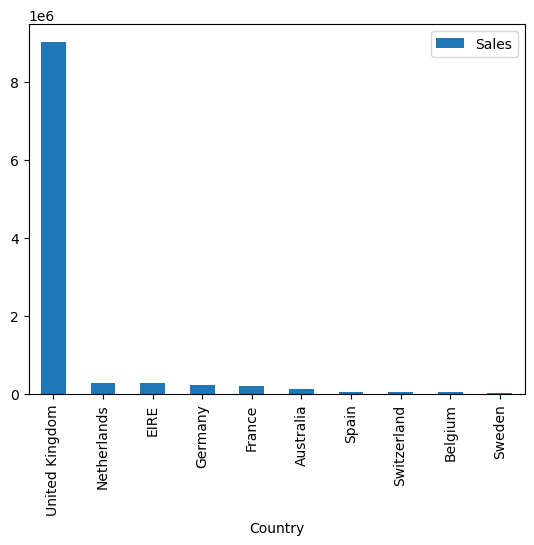

In [125]:
data_temp = customerseg.groupby(['Country'])['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)
print(data_temp)
print(data_temp.plot(x='Country', y='Sales', kind = 'bar'))

In [127]:
#CUSTOMER WHO SPEND THE MOST
customerseg.groupby("InvoiceNo").agg({'Sales': "sum"}).sort_values(by = "Sales", ascending = False).head()
                                      

,Sales
InvoiceNo,
581483,168469.60
541431,77183.60
574941,52940.94
576365,50653.91
556444,38970.00


In [129]:
customerseg.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False,False,False,False


In [131]:
#Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      customerseg.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
Year                0
Month               0
Sales               0
dtype: int64


In [133]:
#DUPLICATE
print(customerseg.duplicated().sum())

5226


In [135]:
#DELETE DUPLICATE:
customerseg = customerseg.drop_duplicates()
customerseg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60


In [137]:
#GENERAL SALES TREND:

general_trend = customerseg.groupby("InvoiceDate")["Sales"].sum()
general_trend = pd.DataFrame(general_trend)
general_trend


,Sales
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 08:45:00,855.86
...,...
2011-12-09 12:23:00,124.60
2011-12-09 12:25:00,140.64
2011-12-09 12:31:00,329.05


In [139]:
#general_trend_months
dates = []
dates.append(pd.to_datetime("201012", format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month), format = "%Y%m") for month in range(1,12)]


In [147]:
# Assuming you already loaded the dataset into 'customerseg'

# Convert InvoiceDate to datetime (correcting format as per your previous message)
customerseg['InvoiceDate'] = pd.to_datetime(customerseg['InvoiceDate'])

# Extract Year and Month
customerseg['Year'] = customerseg['InvoiceDate'].dt.year
customerseg['Month'] = customerseg['InvoiceDate'].dt.month

# Group by Year and Month and sum the TotalPrice
general_trend_months = customerseg.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Set Year and Month as index to match your output style
general_trend_months = general_trend_months.set_index(['Year', 'Month'])

# Display the final result
print(general_trend_months)

                  Sales
Year Month             
2010 12      821452.730
2011 1       689811.610
     2       522545.560
     3       716215.260
     4       536968.491
     5       769296.610
     6       760547.010
     7       718076.121
     8       757841.380
     9      1056435.192
     10     1151263.730
     11     1503866.780
     12      637790.330


C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\3311940947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerseg['InvoiceDate'] = pd.to_datetime(customerseg['InvoiceDate'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\3311940947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerseg['Year'] = customerseg['InvoiceDate'].dt.year
C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\3311940947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [149]:
# #creating a 'YearMonth column for grouping by month
# customerseg["YearMonth"] = customerseg["InvoiceDate"].dt.to_period("M")
# general_trend_months = customerseg.groupby("YearMonth")["Sales"].sum().reset_index()
# general_trend_months["YearMonth"] = general_trend_months["YearMonth"].dt.to_timestamp()
# print(general_trend_months)

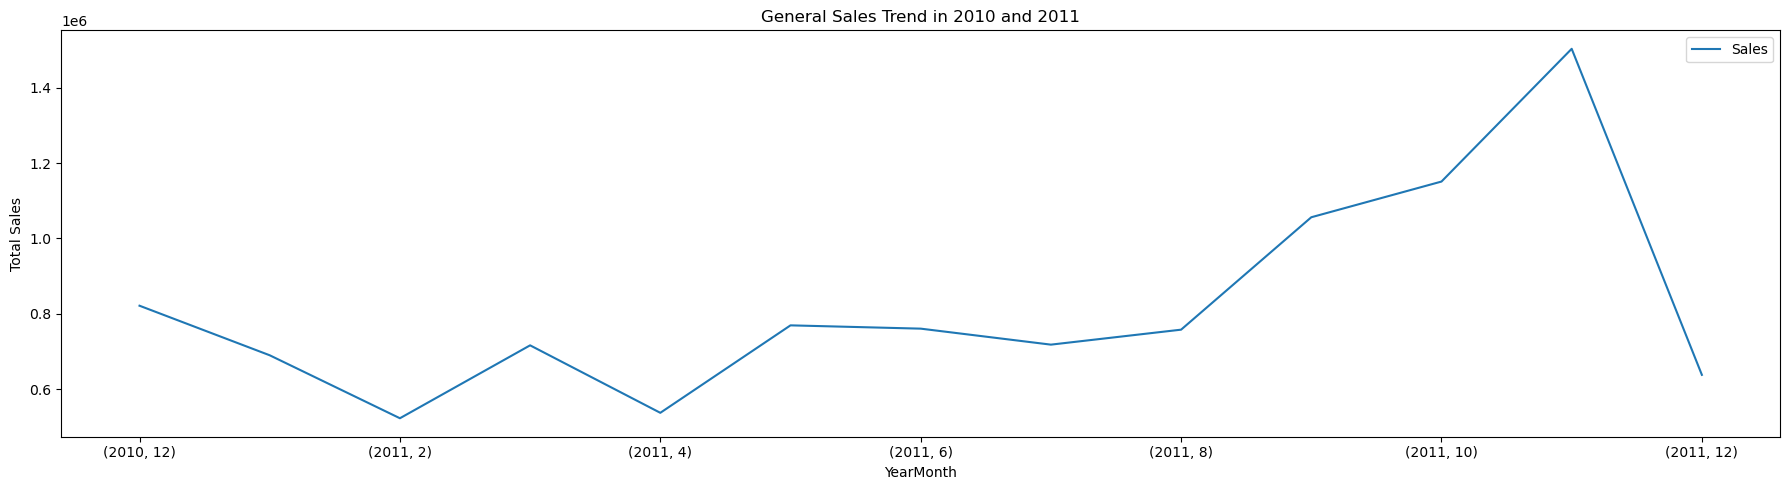

In [159]:
general_trend_months.plot(kind = 'line', figsize=(18,5))
plt.title("General Sales Trend in 2010 and 2011")
plt.xlabel("YearMonth")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [161]:
#Best Selling Product for each Country
#A DataFrame with index as Country and Description, and a column 'Sales'.
sum_total_price_products = pd.DataFrame(customerseg.groupby(["Country","Description"])["Sales"].sum())
# DataFrame with columns:'Country' & 'Best Selling Product'
best_selling_product = pd.DataFrame(data= sum_total_price_products.groupby(["Country"])['Sales'].idxmax().values.tolist(), columns =['Country', 'Best Selling Product'])  

max_sales = sum_total_price_products.groupby("Country")["Sales"].max().values.tolist()
best_selling_product["MaxSales"] = max_sales

total_sales = sum_total_price_products.groupby("Country")["Sales"].sum().values.tolist()
best_selling_product["Total sales"] = total_sales

best_selling_product["% of country sales"] = best_selling_product["MaxSales"]/best_selling_product["Total sales"]


In [163]:

best_selling_product \
.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True), \
 subset=["% of country sales"]) \
.format({"% of country sales":"{:.2%}",
         "Sales":"£{:,.0f}",
         "Country total sales":"£{:,.0f}"})

,Country,Best Selling Product,MaxSales,Total sales,% of country sales
0,Australia,RABBIT NIGHT LIGHT,3375.840000,138453.810000,2.44%
1,Austria,POSTAGE,1456.000000,10198.680000,14.28%
2,Bahrain,OCEAN SCENT CANDLE IN JEWELLED BOX,231.240000,754.140000,30.66%
3,Belgium,POSTAGE,4269.000000,41196.340000,10.36%
4,Brazil,REGENCY CAKESTAND 3 TIER,175.200000,1143.600000,15.32%
5,Canada,POSTAGE,550.940000,3666.380000,15.03%
6,Channel Islands,REGENCY CAKESTAND 3 TIER,517.800000,20440.540000,2.53%
7,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,580.000000,13502.850000,4.30%
8,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,70.800000,826.740000,8.56%
9,Denmark,POSTAGE,744.000000,18955.340000,3.93%


In [175]:
# Ensure 'Sales' column exists — rename TotalPrice if needed
customerseg['Sales'] = customerseg['Quantity'] * customerseg['UnitPrice']

# Create a new DataFrame with necessary columns only
general_trend_country = pd.DataFrame({
    'Date': pd.to_datetime(customerseg['InvoiceDate'], format='%Y-%d-%m %H:%M:%S'),
    'Country': customerseg['Country'],
    'Total price': customerseg['Sales']
})

# Group by Month and Country, and sum only 'Total price'
general_trend_country = (
    general_trend_country
    .groupby([general_trend_country['Date'].dt.to_period("M"), general_trend_country['Country']])
    ['Total price']
    .sum()
    .reset_index()
)

# Optional: Rename period column to 'Month' if you like
general_trend_country.rename(columns={'Date': 'Month'}, inplace=True)

# Display the result
print(general_trend_country.head())


C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\2227325560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerseg['Sales'] = customerseg['Quantity'] * customerseg['UnitPrice']


     Month          Country  Total price
0  2010-12        Australia       965.35
1  2010-12          Austria       277.20
2  2010-12          Bahrain       205.74
3  2010-12          Belgium      1809.91
4  2010-12  Channel Islands       363.53


In [179]:
# Drop the 'Month' column to avoid summing over Period type
top_countries = (
    general_trend_country
    .drop(columns=['Month'])  # or 'Date' if that's the name of the Period column
    .groupby('Country')
    .sum(numeric_only=True)  # Just to be safe with future pandas versions
    .sort_values(by='Total price', ascending=False)
    .head(10)
)

print(top_countries)


                Total price
Country                    
United Kingdom  9001744.094
Netherlands      285446.340
EIRE             283140.520
Germany          228678.400
France           209625.370
Australia        138453.810
Spain             61558.560
Switzerland       57067.600
Belgium           41196.340
Sweden            38367.830


C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\3068983931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerseg['InvoiceDate'] = pd.to_datetime(customerseg['InvoiceDate'])


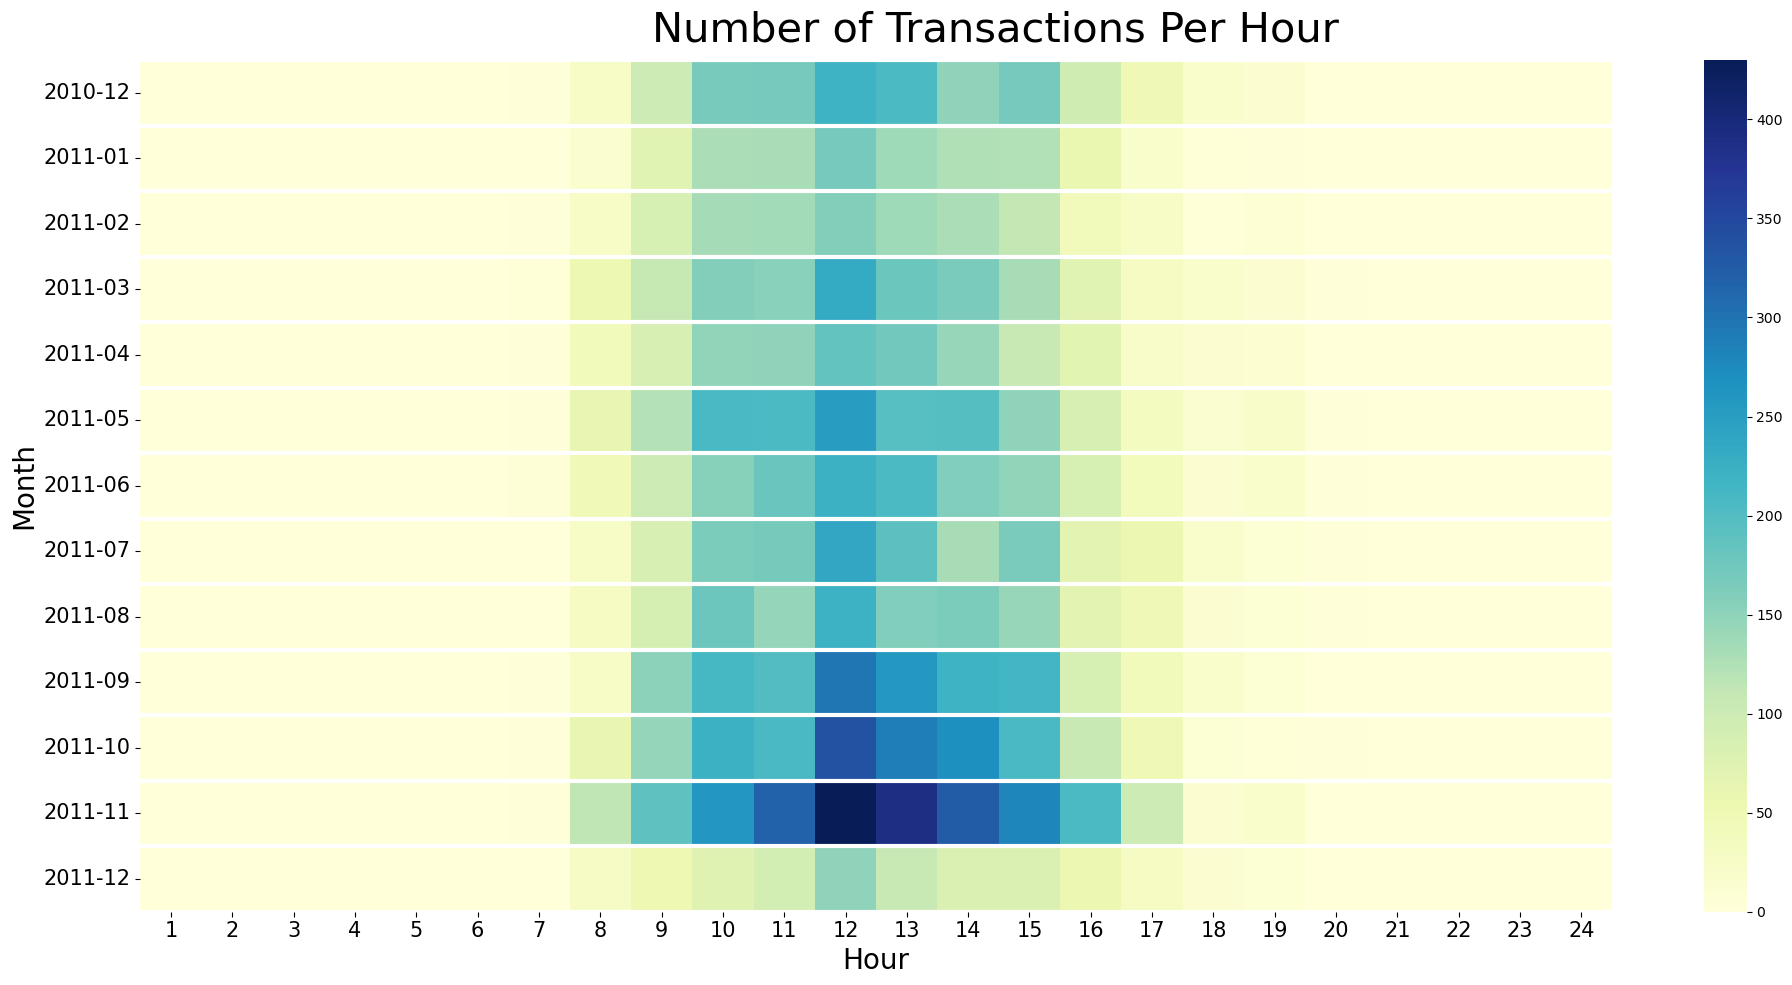

In [181]:
# Step 1: Convert InvoiceDate to datetime if not already done
customerseg['InvoiceDate'] = pd.to_datetime(customerseg['InvoiceDate'])

# Step 2: Group by Customer and InvoiceDate to get total quantity bought in each transaction
df_temp = customerseg.groupby([customerseg['CustomerID'], customerseg['InvoiceDate']]).Quantity.sum().reset_index()

# Step 3: Extract hour of transaction and month (in Period format for monthly grouping)
df_temp["Hour"] = df_temp["InvoiceDate"].dt.hour
df_temp["Month"] = df_temp["InvoiceDate"].dt.to_period('M')

# Step 4: Create a DataFrame to hold transaction frequency for each hour (1–24) across months
count_hours = pd.DataFrame(columns=range(1, 25))
count_hours["Month"] = ""  # We'll fill this in the loop below

# Step 5: Count number of transactions for each hour per month
for month in sorted(df_temp["Month"].unique()):
    row = []
    for hour in range(1, 25):  # Hour from 1 to 24
        freq = len(df_temp[(df_temp["Month"] == month) & (df_temp["Hour"] == hour)])
        row.append(float(freq))
    row.append(month)
    count_hours.loc[len(count_hours)] = row

# Step 6: Set 'Month' as the index for heatmap plotting
count_hours = count_hours.set_index("Month")

# Step 7: Plot heatmap
plt.figure(figsize=(20, 10))
plt.suptitle('Number of Transactions Per Hour', fontsize=30)

# Use seaborn to plot the heatmap
sns.heatmap(data=count_hours, cmap="YlGnBu")

# Customizing axes and labels
plt.yticks(rotation=0, size=15)
plt.xticks(size=15)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Month", fontsize=20)

# Add white horizontal lines for better visual separation between months
for i in range(count_hours.shape[0] + 1):
    plt.axhline(i, color='white', lw=3)

plt.tight_layout()
plt.show()


# RFM analysis


RFM stands for Recency, Frequency, and Monetary analysis. Based on what I’ve learned and understood, it’s a technique used to group or segment customers using their past purchasing behavior.

I’ve summed it up like this:

Recency (R): How recently a customer made a purchase. Customers who purchased more recently are usually more active and responsive.

Frequency (F): How often they’ve bought something. Frequent buyers are likely to be loyal and more engaged.

Monetary (M): How much money they’ve spent overall. Higher spenders are more valuable to the business.

Using these three factors, we can categorize customers into meaningful groups. For example, we can identify top customers, those who might be slipping away, or new ones who just started engaging. This helps in creating more personalized marketing strategies and better decision-making.

In [184]:
customerseg['Date'] = customerseg['InvoiceDate'].apply(lambda x: x.date())
customerseg.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\3165591997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerseg['Date'] = customerseg['InvoiceDate'].apply(lambda x: x.date())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12-01


In [237]:
customerseg.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Date
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,14.85,2011-12-09


In [239]:
import datetime as dt
today_date = dt.datetime(2011, 12, 9)

In [241]:
# Define the functions
rfm = customerseg.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'Sales' : lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [242]:

#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [245]:

seg_map = {
    r'[1-2][1-2]': 'Lost Customer',
    r'[1-2][3-4]': 'Lost Customer',
    r'[1-2]5': 'About to lose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'Retained customers'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,324,1,77183.60,1,1,5,11,Lost Customer
1,12347.0,1,7,4310.00,5,5,5,55,Retained customers
2,12348.0,74,4,1797.24,2,4,4,24,Lost Customer
3,12349.0,17,1,1757.55,4,1,4,41,promising
4,12350.0,309,1,334.40,1,1,2,11,Lost Customer


In [247]:

segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(15)

,segment,count
0,About to lose,63
1,Lost Customer,1664
2,Retained customers,633
3,about_to_sleep,352
4,loyal_customers,819
5,need_attention,187
6,new_customers,42
7,potential_loyalists,484
8,promising,94


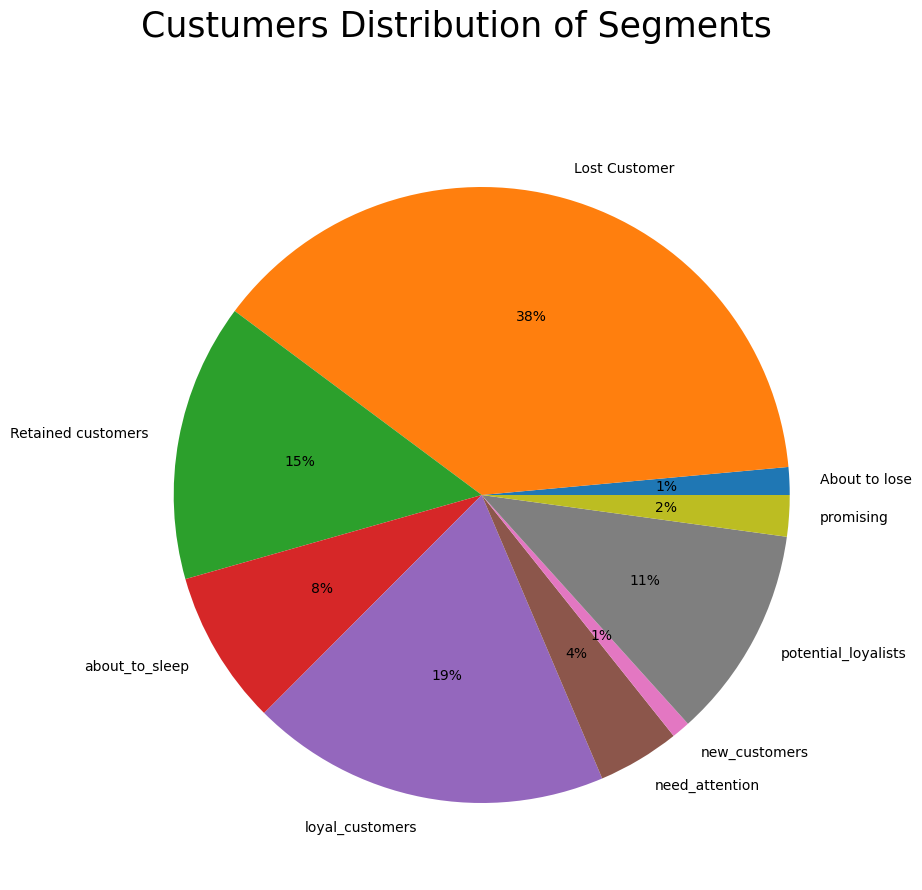

In [249]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

CLUSTERING

In [251]:
df_clustering = customerseg.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'       : 'nunique',
                                     'Sales' : 'sum'})
df_clustering.columns = ['recency', 'frequency', 'monetory']

In [253]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled,columns=['recence', 'frequency', 'monetary'])
df_scaled["CustomerID"] = df_clustering.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

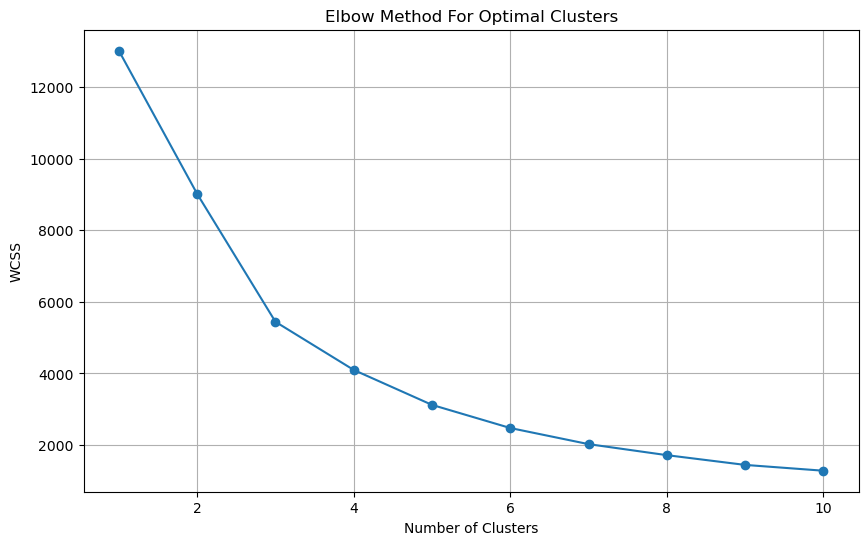

In [257]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=15, random_state=1)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

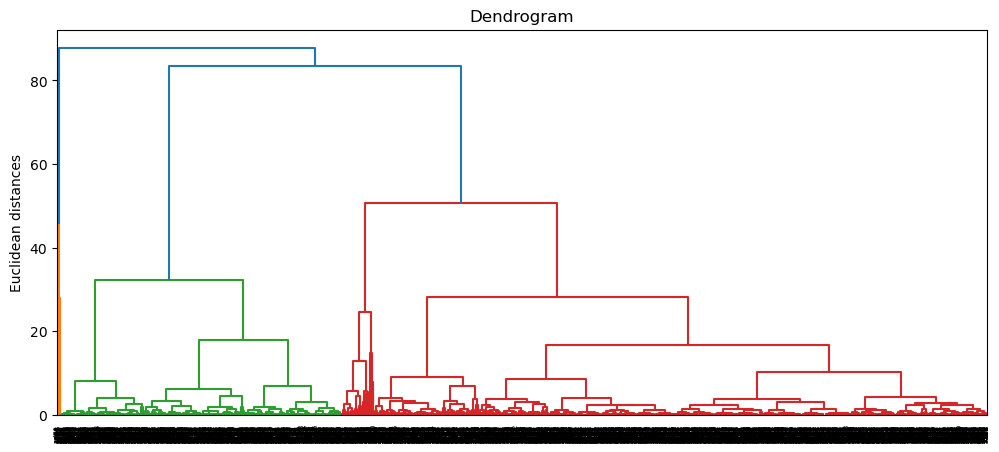

In [259]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [261]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=list(df_scaled))
centroid_df


,recence,frequency,monetary
0,-0.512290,0.052723,-0.021952
1,1.540617,-0.349559,-0.157917
2,-0.865973,8.074597,9.324975


In [263]:
df_labels = pd.DataFrame(kmeans.labels_, columns=['labels'])
df_labels['labels'] = df_labels['labels'].astype('category')


In [265]:
df_kmeans = df_clustering.copy()
df_kmeans['labels'] = df_labels['labels'].values

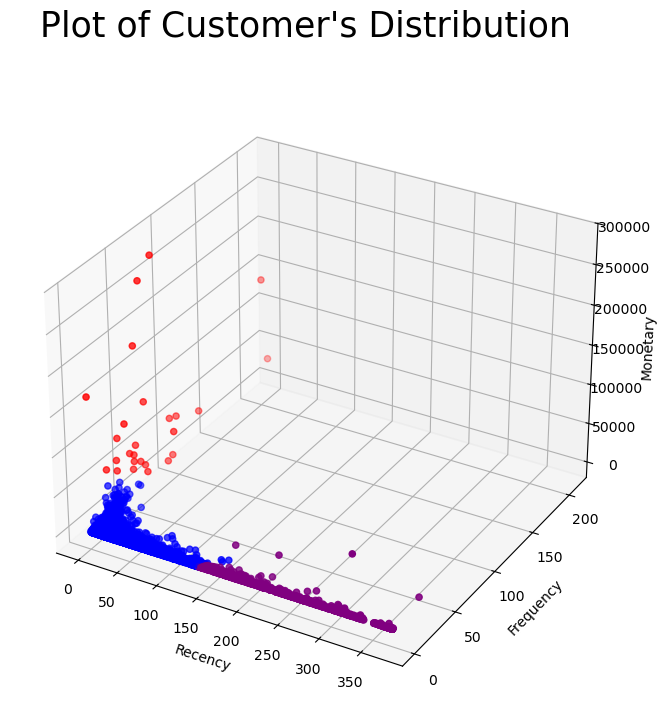

In [271]:
colors = np.array(["blue", "purple", "red", "green"])
fig = plt.figure(figsize=(10, 8)).suptitle("Plot of Customer's Distribution", fontsize=25)
ax = plt.axes(projection='3d')

ax.scatter3D(df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["monetory"],  # fixed here
             marker='o', c=colors[df_kmeans["labels"].tolist()])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_4264\2497758810.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



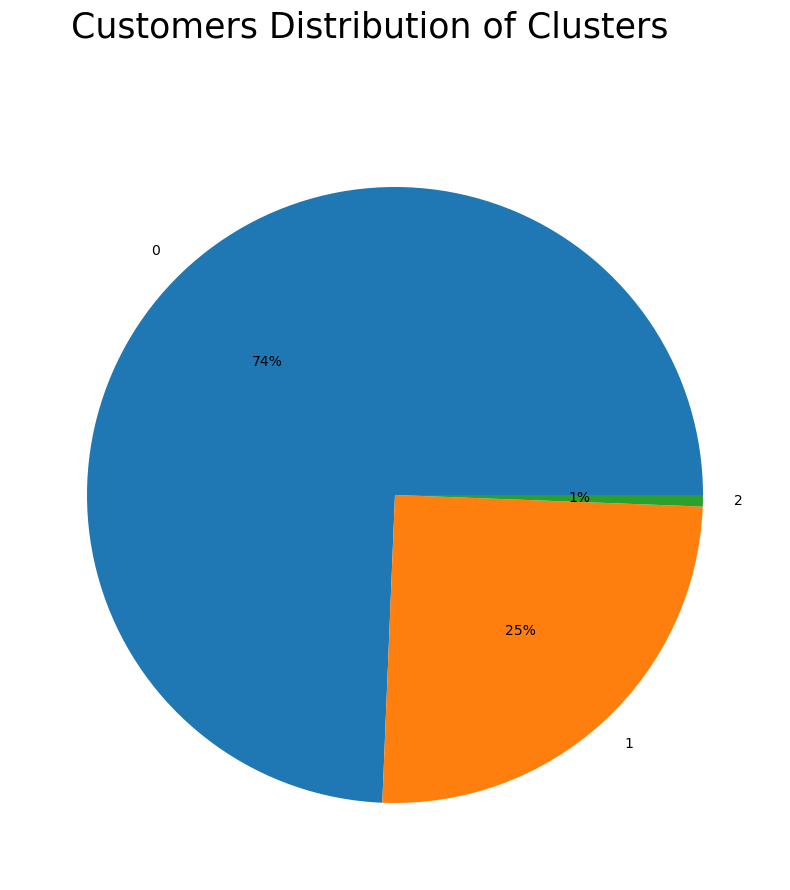

In [269]:
df_kmeans = df_kmeans.reset_index()
clusters_count = df_kmeans.groupby("labels").agg({"CustomerID": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['cluster', 'count']

fig = plt.figure(figsize=(20, 10)).suptitle('Customers Distribution of Clusters', fontsize=25)
plt.pie(clusters_count["count"], labels=clusters_count["cluster"], autopct='%.0f%%')
plt.show()